In [1]:
import os
os.getcwd()

'C:\\Users\\Irfan\\Desktop\\remote internship 2020\\Python codes'

In [2]:
os.chdir("C:/Users/Irfan/Desktop/remote internship 2020/Data sets")
os.getcwd()

'C:\\Users\\Irfan\\Desktop\\remote internship 2020\\Data sets'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data1=pd.read_csv("cereal.csv")
data1

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4.0,1.0,130,10.0,5.0,6.0,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3.0,5.0,15,2.0,8.0,8.0,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4.0,1.0,260,9.0,7.0,5.0,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4.0,0.0,140,14.0,8.0,0.0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2.0,2.0,200,1.0,14.0,8.0,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Trix,G,C,110,1.0,1.0,140,0.0,13.0,12.0,25,25,2,1.0,1.00,27.753301
97,Waffle Crisp,K,C,110,2.0,1.0,165,3.2,28.0,2.0,75,25,2,1.0,1.00,34.325100
98,Wheat Chex,R,C,100,3.0,1.0,230,3.0,17.0,3.0,115,25,1,1.0,0.67,49.787445
99,Wheaties,G,C,100,3.0,1.0,200,3.0,17.0,3.0,110,25,1,1.0,1.00,51.592193


In [4]:
numeric_vars = data1.mean().index[:-4] # Select only relevant composition variables
data1_std = data1[numeric_vars].copy()
data1_std[numeric_vars] = (data1_std[numeric_vars] - data1_std[numeric_vars].mean()) / data1_std[numeric_vars].std()
data1_std.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
0,-1.324404,0.626695,-0.187661,-0.203199,2.500326,-0.975167,0.106477,2.165357,-0.200978
1,0.086915,-0.030586,3.823722,-1.546484,-0.114902,-0.801542,0.535786,0.362022,-1.395025
2,-1.324404,0.626695,-0.187661,1.315298,2.173423,-0.859417,-0.108177,2.662828,-0.200978
3,-1.888931,0.626695,-1.190507,-0.086391,3.807940,-0.801542,-1.181451,2.787196,-0.200978
4,-0.195349,-0.687868,0.815185,0.614453,-0.441805,-0.454291,0.535786,-1.329382,-0.200978


In [5]:
corr_mat = np.corrcoef(data1_std[numeric_vars].T)

In [6]:
u, s, v = np.linalg.svd(corr_mat)
factor_loadings = u * np.sqrt(s)
factor_scores = np.dot(data1_std[numeric_vars].values, factor_loadings)
factor_scores.shape

(101, 9)

In [7]:
[(s[:(i+1)].sum() / s.sum()).round(3) for i in range(len(s))]

[0.306, 0.46, 0.592, 0.711, 0.81, 0.881, 0.937, 0.977, 1.0]

In [8]:
data = []
for t in data1['mfr'].unique():
    # Create a trace
    data.append(go.Scatter(
        x = factor_scores[data1['mfr'] == t, 0],
        y = factor_scores[data1['mfr'] == t, 1],
        text=data1.loc[data1['mfr'] == t].index,
        mode = 'markers',
        name=t))

layout = go.Layout(
    title='Factor scores',
    xaxis=dict(
        title='F1',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='F2',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),)

NameError: name 'go' is not defined

In [9]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

ModuleNotFoundError: No module named 'plotly'

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
data = []
for t in data1['mfr'].unique():
    # Create a trace
    data.append(plt.Scatter(
        x = factor_scores[data1['mfr'] == t, 0],
        y = factor_scores[data1['mfr'] == t, 1],
        text=data1.loc[data1['mfr'] == t].index,
        mode = 'markers',
        name=t))

layout = plt.Layout(
    title='Factor scores',
    xaxis=dict(
        title='F1',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='F2',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),)

AttributeError: module 'matplotlib.pyplot' has no attribute 'Scatter'

In [12]:
import matplotlib.pyplot.scatter as plt
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib.pyplot.scatter'; 'matplotlib.pyplot' is not a package

In [15]:
fig = plt.Figure(data=data, layout=layout)
py.iplot(fig, filename='factor-scores')

NameError: name 'layout' is not defined

In [16]:
import matplotlib.pyplot as plt

In [17]:
data = []
for t in data1['mfr'].unique():
    # Create a trace
    data.append(plt(
        x = factor_scores[data1['mfr'] == t, 0],
        y = factor_scores[data1['mfr'] == t, 1],
        text=data1.loc[data1['mfr'] == t].index,
        mode = 'markers',
        name=t))

layout = plt(
    title='Factor scores',
    xaxis=dict(
        title='F1',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='F2',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),)

TypeError: 'module' object is not callable

In [19]:
rat=data1['rating']

In [20]:
rat

0      68.402973
1      33.983679
2      59.425505
3      93.704912
4      34.384843
         ...    
96     27.753301
97     34.325100
98     49.787445
99     51.592193
100    36.187559
Name: rating, Length: 101, dtype: float64

In [21]:
mfr=data1['mfr']

In [22]:
mfr

0      N
1      Q
2      K
3      K
4      R
      ..
96     G
97     K
98     R
99     G
100    G
Name: mfr, Length: 101, dtype: object

Text(0.5, 0, 'mfr')

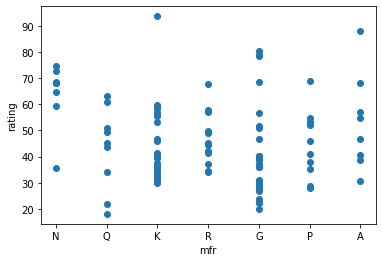

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
ax=plt.plot(mfr,rat,'o')
plt.ylabel("rating")
plt.xlabel("mfr")

In [26]:
mean_rating=data1['rating'].mean()

In [27]:
mean_rating

45.992487465346514

NameError: name 'plot' is not defined

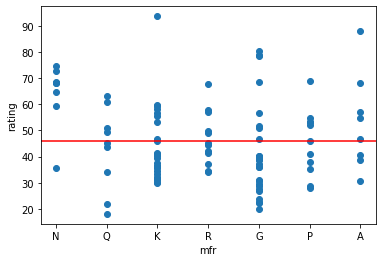

In [28]:
plt.plot(mfr,rat,'o')
plt.ylabel("rating")
plt.xlabel("mfr")
plt.axhline(mean_rating, color='r', linestyle='-')
plot.show()